In [15]:
import re
import unicodedata
import pandas as pd
import nltk


from nltk.corpus import words



import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [16]:
datadf=pd.read_pickle('cleanpickle.pkl')
datadf


df_C=datadf[datadf['language']=='C']
df_Py=datadf[datadf['language']=='Python']
df_Java=datadf[datadf['language']=='Java']

# Seperating to find independent word sets
importantcols=['language', 'repo', 'stemmed']
#Next we isolate the impoortant cols

df_C=df_C[importantcols]
df_Py=df_Py[importantcols]
df_Java=df_Java[importantcols]






In [17]:
def wordset(df):
    dflist=list(df['stemmed'])
    dflist=' '.join(dflist)
    dflist=dflist.split()
    dflist=set(dflist)
    return dflist

c_wordset=wordset(df_C)

py_wordset=wordset(df_Py)

java_wordset=wordset(df_Java)

wordsetslist=[c_wordset,py_wordset,java_wordset]


setints=set()

setints=c_wordset.intersection(*wordsetslist)
setints


unionset=set()

unionset=unionset.union(*wordsetslist)
unionset


disjointfromaggunion=unionset-setints;disjointfromaggunion


unique_C=c_wordset-(py_wordset.union(java_wordset));unique_C
unique_Py=py_wordset-(c_wordset.union(java_wordset));unique_Py
unique_Java=java_wordset-(c_wordset.union(py_wordset));unique_Java


print(f'The total number of unique "words" for each language is as follows:\n\nPython:\n{len(unique_Py)}\n\nC:\n{len(unique_C)}\n\nJava:\n{len(unique_Java)}')
print()
print(f'The total number of unique "words" in the union of every language is as follows:\n{len(unionset)}')
print()
print(f'The total number of unique "words" in the intersection of every language is as follows:\n{len(setints)}')




def wordslist(df):
    dflist=list(df['stemmed'])
    dflist=' '.join(dflist)
    dflist=dflist.split()
    return dflist

def combinedwordlist(df_C,df_Py,df_Java):
    combined=[]
    c_wordlist=wordslist(df_C)
    combined.extend(c_wordlist)

    py_wordlist=wordslist(df_Py)
    combined.extend(py_wordlist)

    java_wordlist=wordslist(df_Java)
    combined.extend(java_wordlist)
    combined.sort()
    return combined


combined=combinedwordlist(df_C,df_Py,df_Java)


def combinedwordcountdf(df_C,df_Py,df_Java):
   combined=[]
   c_wordlist=wordslist(df_C)  
   py_wordlist=wordslist(df_Py)
   java_wordlist=wordslist(df_Java)

   c_wordlist.sort()
   py_wordlist.sort()
   java_wordlist.sort()

   combined.extend(c_wordlist)   
   combined.extend(py_wordlist)   
   combined.extend(java_wordlist)
   combined.sort()
   serieslist=[combined,c_wordlist,py_wordlist,java_wordlist]
   serieslist=[pd.Series(freq).value_counts() for freq in serieslist]
   word_counts_df = (pd.concat(serieslist, axis=1, sort=True)
               .set_axis(['all', 'c', 'py','java'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int)))
   return word_counts_df









  
def wordclouddict(df_C,df_Py,df_Java):
    c_words_list=wordslist(df_C)
    py_words_list=wordslist(df_Py)
    java_words_list=wordslist(df_Java)

    c_words_list=' '.join(c_words_list)
    py_words_list=' '.join(py_words_list)
    java_words_list=' '.join(java_words_list)

    langlists=[c_words_list,
    py_words_list,
    java_words_list]


    landdict=dict(zip(['c','py','java'],langlists))

    return   landdict


def wordclouds(df_C,df_Py,df_Java):
    landdict=wordclouddict(df_C,df_Py,df_Java)
    for i in list(landdict.keys()):
        x=landdict.get(i)
        img = WordCloud(background_color='black',collocations=False).generate(x)
        # WordCloud() produces an image object, which can be displayed with plt.imshow
        plt.imshow(img)
        # axis aren't very useful for a word cloud
        plt.axis('off')
        plt.title(f'Word Cloud for {i}')
        plt.show()




word_counts_df=combinedwordcountdf(df_C,df_Py,df_Java)





The total number of unique "words" for each language is as follows:

Python:
0

C:
675

Java:
0

The total number of unique "words" in the union of every language is as follows:
2383

The total number of unique "words" in the intersection of every language is as follows:
1119


In [18]:

collist=word_counts_df.columns.to_list()

popped=collist.pop(collist.index('all'))
popped

a=word_counts_df[['c','py','java']].applymap(lambda x:1 if x > 0 else x)
b=a.sum(axis=1)
word_counts_df['idf']=3/b
for i in collist:
    word_counts_df[f'{i}_TF']=word_counts_df[i]/word_counts_df[popped]
    word_counts_df[f'{i}_TF/IDF']=word_counts_df[f'{i}_TF']/word_counts_df['idf']


collist=word_counts_df.columns.to_list()
popper=collist.pop(collist.index('idf'))
collist.sort()
collist.insert(1,popper)


word_counts_df=word_counts_df[collist]



In [19]:
## Uncomment below for your first run to create the filter
# total=list(set(combined))
# total.sort()
# total

# total=list(filter(lambda x : x in  words.words(),total))
# total=pd.to_pickle(pd.Series(total),'words.pkl')

# total=pd.read_pickle('words.pkl')






In [20]:

word_counts_df




,all,idf,c,c_TF,c_TF/IDF,java,java_TF,java_TF/IDF,py,py_TF,py_TF/IDF
aa,3,1.5,2,0.666667,0.444444,1,0.333333,0.222222,0,0.000000,0.000000
ability,16,1.0,9,0.562500,0.562500,1,0.062500,0.062500,6,0.375000,0.375000
able,40,1.0,16,0.400000,0.400000,6,0.150000,0.150000,18,0.450000,0.450000
abort,5,1.0,2,0.400000,0.400000,1,0.200000,0.200000,2,0.400000,0.400000
abstract,12,1.5,5,0.416667,0.277778,0,0.000000,0.000000,7,0.583333,0.388889
...,...,...,...,...,...,...,...,...,...,...,...
zip,51,1.0,37,0.725490,0.725490,8,0.156863,0.156863,6,0.117647,0.117647
zipper,8,3.0,8,1.000000,0.333333,0,0.000000,0.000000,0,0.000000,0.000000
zipping,11,3.0,11,1.000000,0.333333,0,0.000000,0.000000,0,0.000000,0.000000
zombie,1,3.0,1,1.000000,0.333333,0,0.000000,0.000000,0,0.000000,0.000000


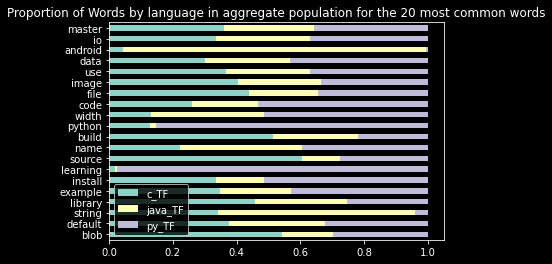

In [21]:
(word_counts_df.sort_values(by='all'))[['c_TF','java_TF','py_TF']].tail(20).plot.barh(stacked=True)

plt.title('Proportion of Words by language in aggregate population for the 20 most common words');



In [22]:
aggvaldic=pd.Series(combined).value_counts()

combinedvalcount=dict(zip(aggvaldic.index.to_list(),list(aggvaldic.values)))
intersectiondic={}
for i in setints:
    a=combinedvalcount.get(i)
    intersectiondic.update({i:a})

intersectiondic
intersectionfreqlist=[]
for i in list(intersectiondic.keys()):
    n=int(intersectiondic.get(i))
    for r in range(0,n):
        intersectionfreqlist.append(i)
len(intersectionfreqlist)


intersectionfreqlist=' '.join(intersectionfreqlist)






In [23]:
anytwouniondic={}
for i in disjointfromaggunion:
    a=combinedvalcount.get(i)
    anytwouniondic.update({i:a})

anytwouniondic
anytwounion=[]
for i in list(anytwouniondic.keys()):
    n=int(anytwouniondic.get(i))
    for r in range(0,n):
        anytwounion.append(i)
len(anytwounion)


anytwofreqlist=' '.join(anytwounion)



In [24]:
combined=' '.join(combined)



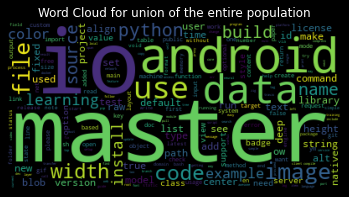

In [25]:

img = WordCloud(background_color='black',collocations=False).generate(combined)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Word Cloud for union of the entire population');



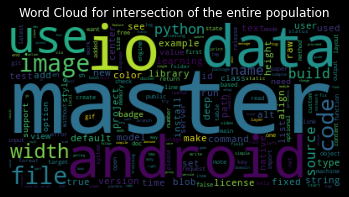

In [26]:

img = WordCloud(background_color='black',collocations=False).generate(intersectionfreqlist)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Word Cloud for intersection of the entire population');


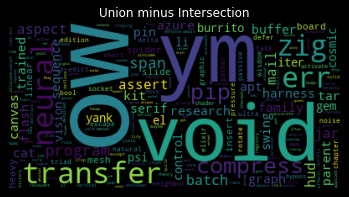

In [27]:
img = WordCloud(background_color='black',collocations=False).generate(anytwofreqlist)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Union minus Intersection');

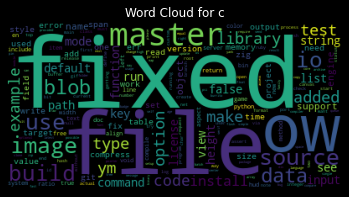

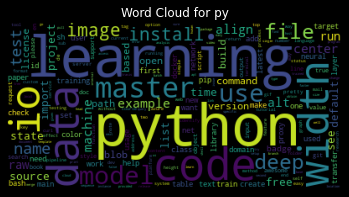

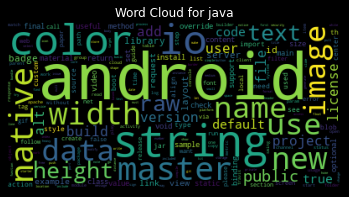

In [28]:
wordclouds(df_C,df_Py,df_Java)

